In [102]:
# https://www.kaggle.com/datasets/saisaathvik/house-rent-prices-of-metropolitan-cities-in-india?select=Kolkata_rent.csv

In [103]:
import pandas as pd
import numpy as np
import statistics as st

In [104]:
chennai_df = pd.read_csv('Chennai.csv')
chennai_df['dataset'] = 'Chennai'

hyderabad_df = pd.read_csv('Hyderabad.csv')
hyderabad_df['dataset'] = 'Hydebarad'

kolkata_df = pd.read_csv('Kolkata.csv')
kolkata_df['dataset'] = 'Kolkata'

In [105]:
#chennai_df.head()

In [106]:
#hyderabad_df.head()

In [107]:
#kolkata_df.head()

In [108]:
df = pd.concat([chennai_df, hyderabad_df, kolkata_df])

In [126]:
#df.info()

In [110]:
df['property_type'] = df['property_type'].astype(str)

In [111]:
df['bathroom'] = df['bathroom'].str.replace('bathrooms', '')

In [112]:
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(np.float64)

### Apaga todos os registros que tem valores nulos

In [113]:
def drop_null_rows(columns):
    for column in columns:
        df.drop(df[df[column].isnull()].index.tolist(), axis=0, inplace=True)

In [114]:
drop_null_rows(list(df.columns))

### Análise numérica de estatísticas descritivas

In [115]:
df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,dataset
0,OWNER,3.0,BHK,Apartment,Ambattur,17000.0,1570.0,Semi-Furnished,2,Chennai
1,OWNER,2.0,BHK,Apartment,Kelambakkam,16000.0,1402.0,Semi-Furnished,2,Chennai
2,OWNER,2.0,BHK,Apartment,Adyar,20000.0,800.0,Semi-Furnished,2,Chennai
3,OWNER,2.0,BHK,Apartment,Sembakkam,14000.0,1180.0,Unfurnished,2,Chennai
4,OWNER,1.0,BHK,Independent House,Mogappair,7000.0,400.0,Unfurnished,1,Chennai
...,...,...,...,...,...,...,...,...,...,...
9893,OWNER,2.0,BHK,Apartment,Netaji Nagar,13500.0,838.0,Semi-Furnished,2,Kolkata
9894,OWNER,3.0,BHK,Apartment,Rajarhat,15000.0,1100.0,Semi-Furnished,2,Kolkata
9896,OWNER,2.0,BHK,Apartment,Baguihati,12000.0,925.0,Semi-Furnished,2,Kolkata
9898,OWNER,3.0,BHK,Independent Floor,Shibpur,7500.0,960.0,Unfurnished,1,Kolkata


In [116]:
def analise_preco(coluna):
    global df
    
    dct_retorno = {}    
    s_coluna = df[coluna].value_counts()   
    
    for i in range(len(s_coluna)):
        dct_sts = {}
        index = s_coluna.index[i]
        
        
        preco = df[df[coluna] == index]['price']
        
        media = st.mean(preco)
        moda = st.mode(preco)
        mediana = st.median(preco)
        desvio_padrao = st.stdev(preco)
        quartis = st.quantiles(preco)
                
        dct_sts['MEDIA'] = round(media,2)
        dct_sts['MODA'] = round(moda,2)
        dct_sts['MEDIANA'] = round(mediana,2)
        dct_sts['DESVIO PADRAO'] = round(desvio_padrao,2)
        dct_sts['QUARTIS'] = quartis  
        
        #dct_retorno[index] = (dct_sts,preco) 
        dct_retorno[index] = dct_sts 
        
    
    return dct_retorno

In [117]:
def analise_desc_num(coluna):
    global df
    
    dct_retorno = {}    
    s_coluna = df[coluna].value_counts()
      
    media = st.mean(s_coluna)
    moda = st.mode(s_coluna)
    mediana = st.median(s_coluna)
    desvio_padrao = st.stdev(s_coluna)
    quartis = st.quantiles(s_coluna)
    
    dct_retorno['MEDIA'] = media
    dct_retorno['MODA'] = moda
    dct_retorno['MEDIANA'] = mediana
    dct_retorno['DESVIO PADRAO'] = desvio_padrao
    dct_retorno['QUARTIS'] = quartis    
    
    return dct_retorno
    

### Análise individual das colunas

#### Coluna - 'seller_type'

{'MEDIA': 9022.666666666666, 'MODA': 15036, 'MEDIANA': 11906, 'DESVIO PADRAO': 7862.07563772655, 'QUARTIS': [126.0, 11906.0, 15036.0]}


<AxesSubplot: >

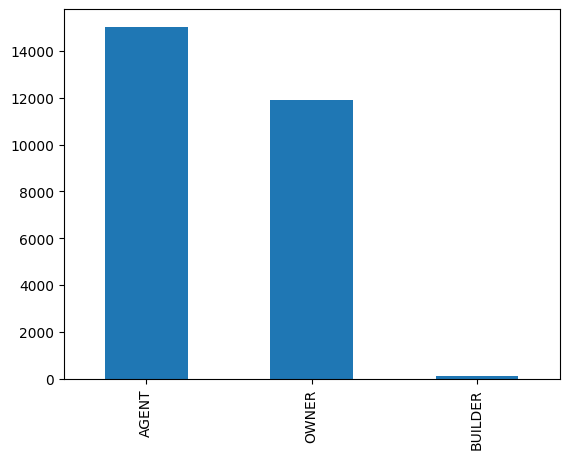

In [118]:
coluna_analise = 'seller_type'

statis = analise_desc_num(coluna_analise)


print(statis)
df[coluna_analise].value_counts().plot(kind='bar')

#### Coluna - 'layout_type'

{'MEDIA': 13534, 'MODA': 25851, 'MEDIANA': 13534.0, 'DESVIO PADRAO': 17418.868447749413, 'QUARTIS': [-4941.5, 13534.0, 32009.5]}


<AxesSubplot: >

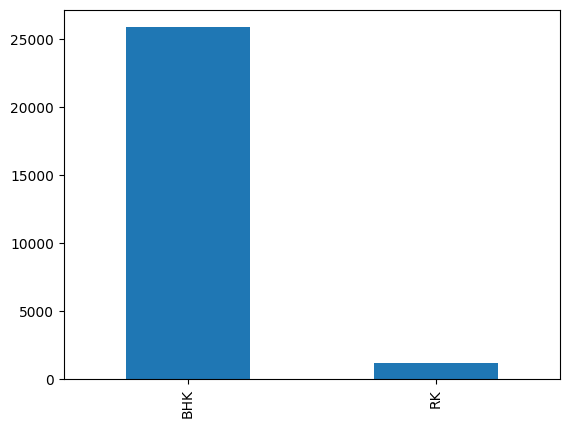

In [119]:
coluna_analise = 'layout_type'

statis = analise_desc_num(coluna_analise)


print(statis)
df[coluna_analise].value_counts().plot(kind='bar')

#### Coluna - 'property_type'

{'MEDIA': 4511.333333333333, 'MODA': 18288, 'MEDIANA': 2199.5, 'DESVIO PADRAO': 6924.300041640792, 'QUARTIS': [316.5, 2199.5, 7535.25]}


<AxesSubplot: >

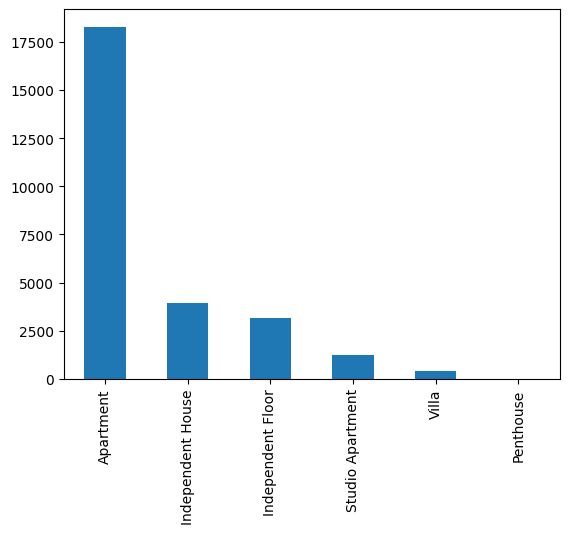

In [120]:
coluna_analise = 'property_type'

statis = analise_desc_num(coluna_analise)


print(statis)
df[coluna_analise].value_counts().plot(kind='bar')

### Analise do preco por atributo de coluna

#### Coluna - 'seller_type'

{'AGENT': {'MEDIA': 20553.67, 'MODA': 15000.0, 'MEDIANA': 17000.0, 'DESVIO PADRAO': 14917.17, 'QUARTIS': [10000.0, 17000.0, 25000.0]}, 'OWNER': {'MEDIA': 14224.57, 'MODA': 10000.0, 'MEDIANA': 12000.0, 'DESVIO PADRAO': 9795.62, 'QUARTIS': [8000.0, 12000.0, 17000.0]}, 'BUILDER': {'MEDIA': 28069.99, 'MODA': 30000.0, 'MEDIANA': 27500.0, 'DESVIO PADRAO': 18666.77, 'QUARTIS': [11225.0, 27500.0, 42750.0]}}


<AxesSubplot: xlabel='price', ylabel='seller_type'>

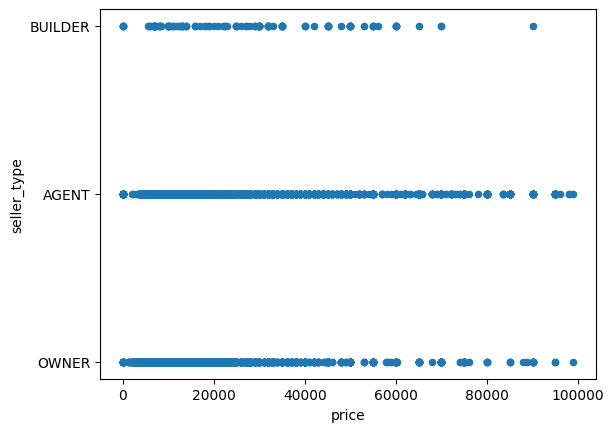

In [129]:
coluna_analise = 'seller_type'

statis = analise_preco(coluna_analise)
print(statis)


df.plot(kind='scatter', x='price', y=coluna_analise)

#### Coluna - 'layout_type'

{'BHK': {'MEDIA': 18282.33, 'MODA': 15000.0, 'MEDIANA': 15000.0, 'DESVIO PADRAO': 13380.65, 'QUARTIS': [10000.0, 15000.0, 22000.0]}, 'RK': {'MEDIA': 7660.57, 'MODA': 5000.0, 'MEDIANA': 6000.0, 'DESVIO PADRAO': 6517.32, 'QUARTIS': [5000.0, 6000.0, 8000.0]}}


<AxesSubplot: xlabel='price', ylabel='layout_type'>

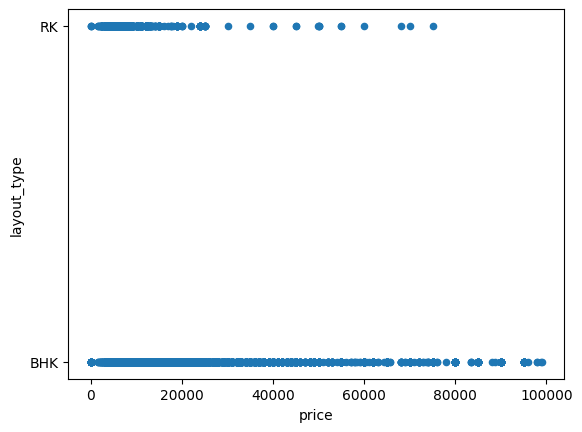

In [130]:
coluna_analise = 'layout_type'

statis = analise_preco(coluna_analise)
print(statis)


df.plot(kind='scatter', x='price', y=coluna_analise)

#### Coluna - 'property_type'

{'Apartment': {'MEDIA': 19734.73, 'MODA': 15000.0, 'MEDIANA': 16000.0, 'DESVIO PADRAO': 13349.27, 'QUARTIS': [11000.0, 16000.0, 24507.5]}, 'Independent House': {'MEDIA': 13820.43, 'MODA': 10000.0, 'MEDIANA': 10000.0, 'DESVIO PADRAO': 12523.46, 'QUARTIS': [7000.0, 10000.0, 15000.0]}, 'Independent Floor': {'MEDIA': 14487.46, 'MODA': 10000.0, 'MEDIANA': 12000.0, 'DESVIO PADRAO': 10513.22, 'QUARTIS': [8000.0, 12000.0, 17125.0]}, 'Studio Apartment': {'MEDIA': 7660.57, 'MODA': 5000.0, 'MEDIANA': 6000.0, 'DESVIO PADRAO': 6517.32, 'QUARTIS': [5000.0, 6000.0, 8000.0]}, 'Villa': {'MEDIA': 25877.25, 'MODA': 25000.0, 'MEDIANA': 22000.0, 'DESVIO PADRAO': 22382.34, 'QUARTIS': [9000.0, 22000.0, 35000.0]}, 'Penthouse': {'MEDIA': 15625.0, 'MODA': 13000.0, 'MEDIANA': 11000.0, 'DESVIO PADRAO': 14073.06, 'QUARTIS': [7625.0, 11000.0, 22000.0]}}


<AxesSubplot: xlabel='price', ylabel='property_type'>

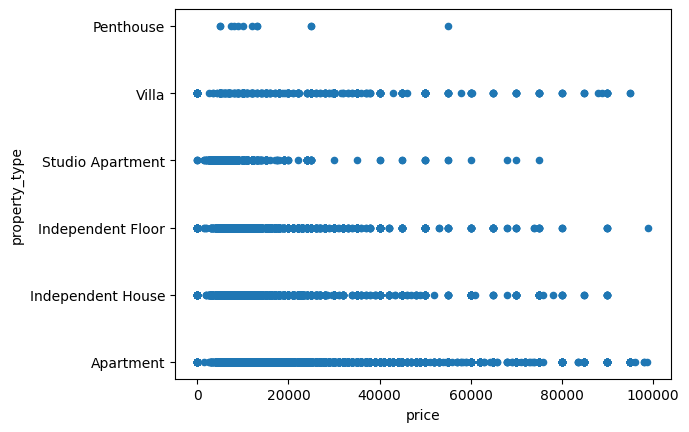

In [137]:
coluna_analise = 'property_type'

statis = analise_preco(coluna_analise)
print(statis)


df.plot(kind='scatter', x='price', y=coluna_analise)